# PHYS-E0412 Computational Physics :: Homework 11
Ari Viitala 432568

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [34]:
N = 1000
h = 1 / (N - 1)
x = np.linspace(0,1, N)
u0 = 1.831 * np.exp(-10 * (x - 0.5)**2)
u0 -= u0[0]
t_steps = 100
time = np.linspace(0, 0.1, 100)[1:]
t_h = time[1] - time[0]

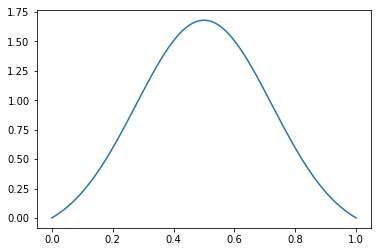

In [35]:
plt.plot(x, u0)
plt.show()

In [41]:
stencil =  1 / h**2 * (2 * np.eye(N) - np.diag(np.ones(N-1), 1) - np.diag(np.ones(N-1), -1))  
stencil[0] = 0
stencil[-1] = 0
stencil[0, 0] = 1
stencil[-1, -1] = 1

In [151]:
u = [u0]
for i, t in enumerate(time):
    u1 = np.linalg.solve(np.eye(N) + t_h * stencil, u[i])
    u.append(u1)

u= np.array(u)

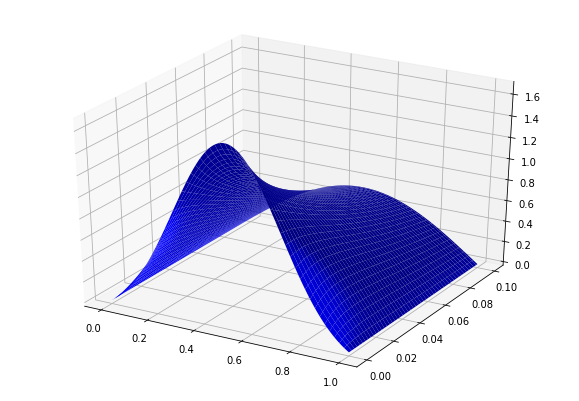

In [152]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u, color='b') 
plt.show() 

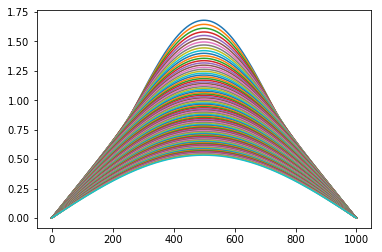

In [153]:
for i in range(t_steps):
    plt.plot(u[i])

In [154]:
u_cn = [u0]
first = np.linalg.solve(np.eye(N) + 0.5 * t_h * stencil, np.eye(N))
second = np.eye(N) - 0.5 * t_h * stencil
m = first @ second
for i, t in enumerate(time):
    u1 = m.dot(u[i])
    u_cn.append(u1)
    
u_cn = np.array(u_cn)

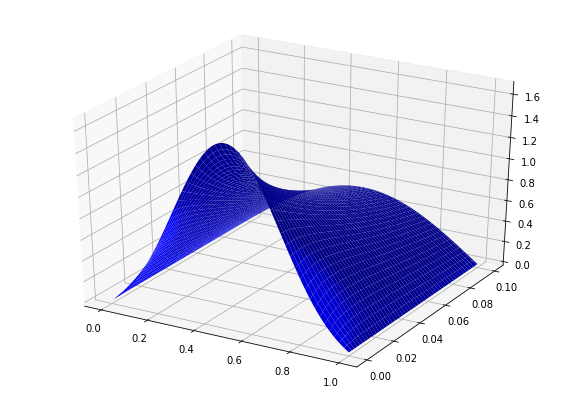

In [155]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u_cn, color='b') 
plt.show() 

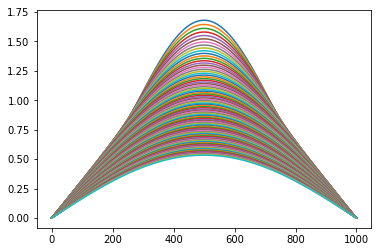

In [156]:
for i in range(t_steps):
    plt.plot(u_cn[i])

In [157]:
u_cn_r = [u_cn[-1]]
first = np.linalg.solve(np.eye(N) - 0.5 * t_h * stencil, np.eye(N))
second = np.eye(N) + 0.5 * t_h * stencil
m = first @ second
for i, t in enumerate(time):
    u1 = m.dot(u_cn_r[i])
    u_cn_r.append(u1)
    
u_cn_r = np.array(u_cn_r)

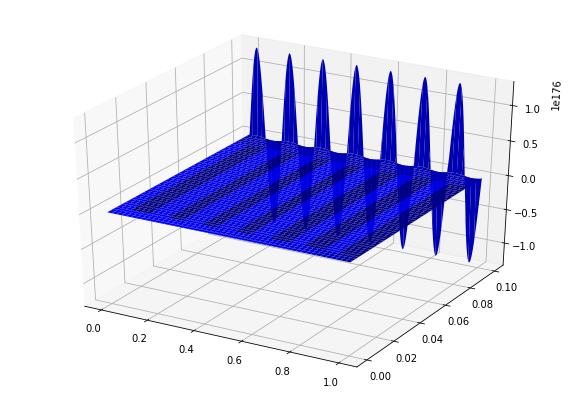

In [158]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u_cn_r, color='b') 
plt.show() 

In [159]:
u_r = [u[-1]]
for i, t in enumerate(time):
    u1 = np.linalg.solve(np.eye(N) - t_h * stencil, u_r[i])
    u_r.append(u1)

u_r= np.array(u_r)

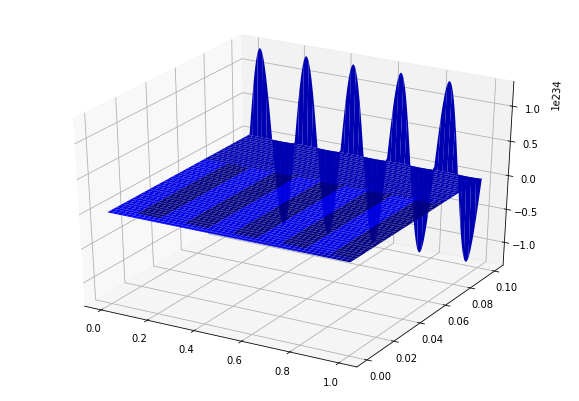

In [160]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u_r, color='b') 
plt.show() 

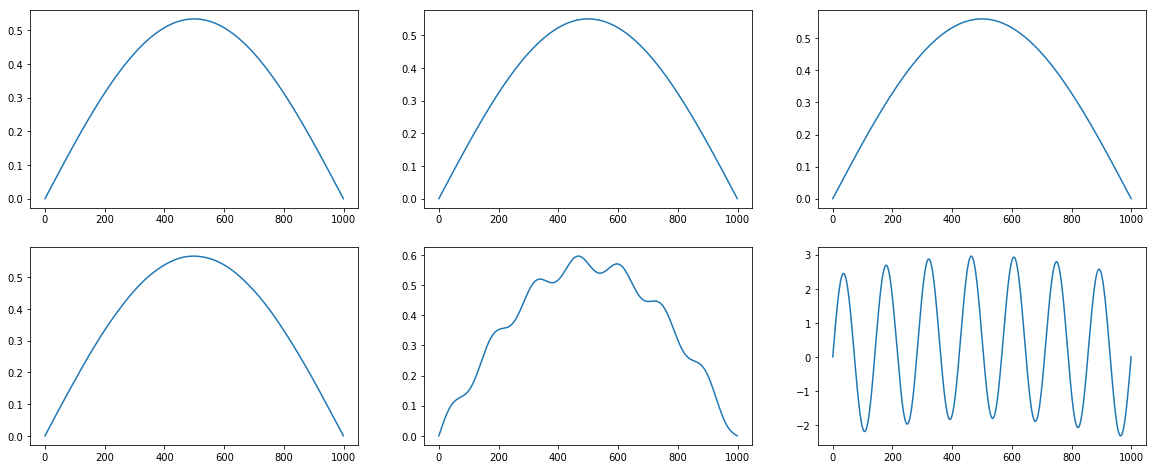

In [161]:
plt.figure(1, (20, 8))
plt.subplot(2, 3, 1)
plt.plot(u_cn_r[0])
plt.subplot(2, 3, 2)
plt.plot(u_cn_r[3])
plt.subplot(2, 3, 3)
plt.plot(u_cn_r[5])
plt.subplot(2, 3, 4)
plt.plot(u_cn_r[6])
plt.subplot(2, 3, 5)
plt.plot(u_cn_r[7])
plt.subplot(2, 3, 6)
plt.plot(u_cn_r[8])

In [162]:
S = []
S_cn = []

for i in range(t_steps):
    u_norm = (u[i] / np.trapz(u[i], x))[1:-1]
    u_cn_norm = (u_cn[i] / np.trapz(u_cn[i], x))[1:-1]
    
    S.append(-np.trapz(u_norm * np.log(u_norm), x[1:-1]))
    S_cn.append(-np.trapz(u_cn_norm * np.log(u_cn_norm), x[1:-1]))
    
    

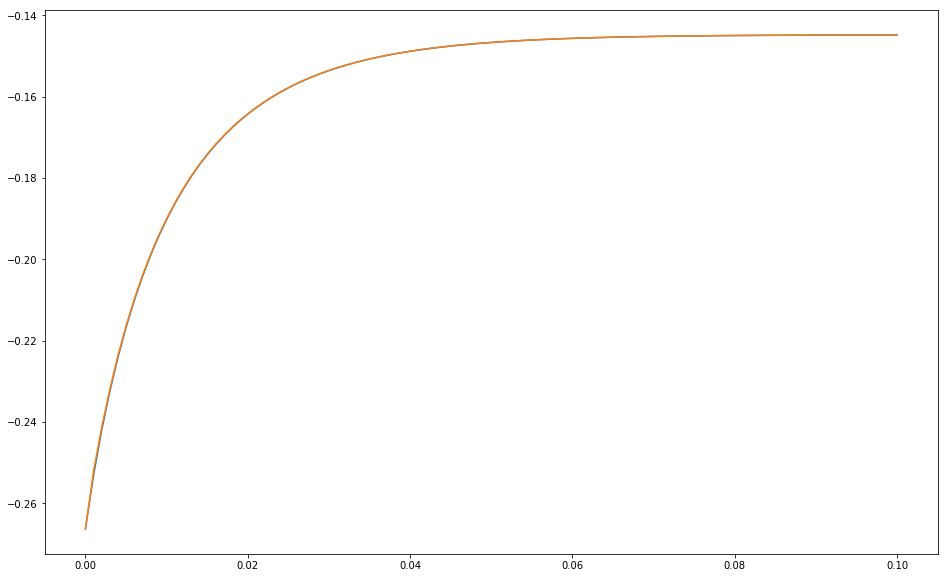

In [166]:
plt.figure(1, (16, 10))
p_time = [0] + list(time)
plt.plot(np.linspace(0,0.1, t_steps), S)
plt.plot(np.linspace(0,0.1, t_steps), S_cn)

In [120]:
S_cn[:5]

[-0.2663547265636052,
 -0.2667059918919294,
 -0.25339651028349747,
 -0.24224819919029308,
 -0.23263610618880326]

In [121]:
S[:5]

[-0.2663547265636052,
 -0.2530521791886466,
 -0.24190666344913525,
 -0.23229611177102846,
 -0.2238930564555186]

In [116]:
u[0].shape

(1000,)

In [115]:
len(time)

99

array([ 0.00000000e+00,  1.39285883e-03,  1.29546754e-03,  1.20565949e-03,
        1.12284983e-03,  1.04649862e-03,  9.76107415e-04,  9.11216106e-04,
        8.51399945e-04,  7.96266861e-04,  7.45454945e-04,  6.98630140e-04,
        6.55484102e-04,  6.15732231e-04,  5.79111844e-04,  5.45380494e-04,
        5.14314419e-04,  4.85707100e-04,  4.59367943e-04,  4.35121051e-04,
        4.12804095e-04,  3.92267269e-04,  3.73372329e-04,  3.55991703e-04,
        3.40007667e-04,  3.25311590e-04,  3.11803231e-04,  2.99390095e-04,
        2.87986834e-04,  2.77514697e-04,  2.67901021e-04,  2.59078762e-04,
        2.50986061e-04,  2.43565844e-04,  2.36765453e-04,  2.30536303e-04,
        2.24833571e-04,  2.19615903e-04,  2.14845143e-04,  2.10486094e-04,
        2.06506280e-04,  2.02875742e-04,  1.99566839e-04,  1.96554072e-04,
        1.93813916e-04,  1.91324668e-04,  1.89066304e-04,  1.87020354e-04,
        1.85169773e-04,  1.83498840e-04,  1.81993049e-04,  1.80639016e-04,
        1.79424393e-04,  

In [123]:
u[1] - u_cn[1]

array([-3.98810035e-13,  1.81917577e-03,  2.13641618e-03,  2.44990582e-03,
        2.75939990e-03,  3.06468781e-03,  3.36559000e-03,  3.66195512e-03,
        3.95365740e-03,  4.24059425e-03,  4.52268404e-03,  4.79986408e-03,
        5.07208874e-03,  5.33932776e-03,  5.60156468e-03,  5.85879543e-03,
        6.11102697e-03,  6.35827615e-03,  6.60056857e-03,  6.83793758e-03,
        7.07042340e-03,  7.29807224e-03,  7.52093556e-03,  7.73906939e-03,
        7.95253367e-03,  8.16139167e-03,  8.36570951e-03,  8.56555564e-03,
        8.76100044e-03,  8.95211581e-03,  9.13897484e-03,  9.32165147e-03,
        9.50022021e-03,  9.67475590e-03,  9.84533345e-03,  1.00120277e-02,
        1.01749130e-02,  1.03340635e-02,  1.04895526e-02,  1.06414529e-02,
        1.07898362e-02,  1.09347733e-02,  1.10763341e-02,  1.12145871e-02,
        1.13495998e-02,  1.14814385e-02,  1.16101682e-02,  1.17358524e-02,
        1.18585533e-02,  1.19783320e-02,  1.20952477e-02,  1.22093587e-02,
        1.23207215e-02,  